In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from matplotlib.pyplot import figure
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC,SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import plot_confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as rmse
%matplotlib inline

In [2]:
os.chdir(r"C:\Users\Priya Sharma\OneDrive\Desktop\Python Work\Models by me")
train=pd.read_csv("Train.csv")
predictionDf=pd.read_csv("Test.csv")

In [3]:
predictionDf["Global_Sales"]=0

In [4]:
from sklearn.model_selection import train_test_split
trainDf, testDf = train_test_split(train,train_size=0.7,random_state=123)

In [5]:
trainDf['Source'] = "Train"
testDf['Source'] = "Test"
predictionDf['Source'] = "Prediction"

In [6]:
df = pd.concat([trainDf, testDf, predictionDf], axis = 0)

In [7]:
df.drop(["Publisher","Name","User_Count"],axis=1,inplace=True)

In [8]:
df.head()

,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,Developer,Rating,Global_Sales,Source
4313,X360,2008.0,Shooter,0.30,0.11,0.00,69.0,54.0,7.3,Nerve Software,T,0.45,Train
2323,GBA,2001.0,Platform,0.60,0.22,0.05,91.0,22.0,8.5,KCEK,T,0.89,Train
3493,PSP,2005.0,Racing,0.53,0.00,0.00,63.0,32.0,7.8,Climax Group,E,0.57,Train
2238,PC,2012.0,Shooter,0.42,0.41,0.00,89.0,38.0,8.2,Gearbox Software,M,0.93,Train
6756,Wii,2010.0,Action,0.20,0.02,0.00,62.0,7.0,tbd,EA Bright Light,E,0.25,Train


In [9]:
df.columns

Index(['Platform', 'Year_of_Release', 'Genre', 'NA_Sales', 'EU_Sales',
       'JP_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'Developer',
       'Rating', 'Global_Sales', 'Source'],
      dtype='object')

In [10]:
df.shape

(16719, 13)

In [11]:
df.isnull().sum()

Platform              0
Year_of_Release     269
Genre                 2
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
Developer          6623
Rating             6769
Global_Sales          0
Source                0
dtype: int64

In [12]:
for i in df.columns:
    if (i!="Global_Sales" and i!="Source"):
        if df[i].dtype=="object":
            tempMode=df.loc[df["Source"]=="Train",i].mode()[0]
            df[i].fillna(tempMode,inplace=True)
        else:
            tempMed=df.loc[df["Source"]=="Train",i].median()
            df[i].fillna(tempMed,inplace=True)


In [13]:
df.isnull().sum()

Platform           0
Year_of_Release    0
Genre              0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Critic_Score       0
Critic_Count       0
User_Score         0
Developer          0
Rating             0
Global_Sales       0
Source             0
dtype: int64

In [14]:
corrDf = df[df["Source"] == "Train"].corr()

<AxesSubplot:>

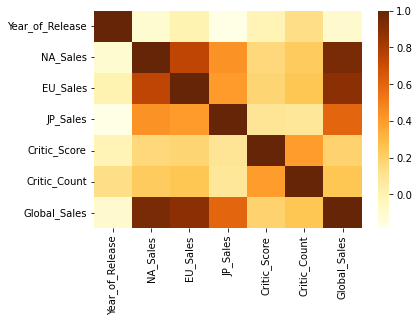

In [15]:
sns.heatmap(corrDf,xticklabels=corrDf.columns,yticklabels=corrDf.columns, cmap='YlOrBr')

In [16]:
genre_map = {"Action":0,"Sports":1,"Misc":2,"Role-Playing":3,"Shooter":4,"Adventure":5,"Racing":6,"Platform":8,"Simulation":9,"Fighting":10,"Strategy":11,"Puzzle":12}

In [17]:
df['Genre']= df['Genre'].map(genre_map)

In [18]:
rating_map = {"E":0,"T":1,"M":2,"E10+":3,"EC":4,"K-A":5,"RP":6,"AO":7}

In [19]:
df['Rating'] = df['Rating'].map(rating_map)

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
labelencoder=LabelEncoder()

In [22]:
df["Developer"]=labelencoder.fit_transform(df["Developer"])
df["User_Score"]=labelencoder.fit_transform(df["User_Score"])

In [23]:
df.dtypes

Platform            object
Year_of_Release    float64
Genre                int64
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Critic_Score       float64
Critic_Count       float64
User_Score           int32
Developer            int32
Rating               int64
Global_Sales       float64
Source              object
dtype: object

In [24]:
df.head()

,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,Developer,Rating,Global_Sales,Source
4313,X360,2008.0,4,0.30,0.11,0.00,69.0,54.0,70,999,1,0.45,Train
2323,GBA,2001.0,8,0.60,0.22,0.05,91.0,22.0,82,786,1,0.89,Train
3493,PSP,2005.0,6,0.53,0.00,0.00,63.0,32.0,75,299,0,0.57,Train
2238,PC,2012.0,4,0.42,0.41,0.00,89.0,38.0,79,599,2,0.93,Train
6756,Wii,2010.0,0,0.20,0.02,0.00,62.0,7.0,95,430,0,0.25,Train


In [25]:
df.shape

(16719, 13)

In [26]:
df2 = pd.get_dummies(df, drop_first = True)

In [27]:
df2.shape

(16719, 43)

In [28]:
df2 = add_constant(df2)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [29]:
df2.head()

,const,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,Developer,...,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Source_Test,Source_Train
4313,1.0,2008.0,4,0.30,0.11,0.00,69.0,54.0,70,999,...,0,0,0,0,0,1,0,0,0,1
2323,1.0,2001.0,8,0.60,0.22,0.05,91.0,22.0,82,786,...,0,0,0,0,0,0,0,0,0,1
3493,1.0,2005.0,6,0.53,0.00,0.00,63.0,32.0,75,299,...,0,0,0,0,0,0,0,0,0,1
2238,1.0,2012.0,4,0.42,0.41,0.00,89.0,38.0,79,599,...,0,0,0,0,0,0,0,0,0,1
6756,1.0,2010.0,0,0.20,0.02,0.00,62.0,7.0,95,430,...,0,0,0,1,0,0,0,0,0,1


In [30]:
trainDf = df2[df2['Source_Train'] == 1].drop(['Source_Train', 'Source_Test'], axis = 1).copy()
testDf = df2[df2['Source_Test'] == 1].drop(['Source_Train', 'Source_Test'], axis = 1).copy()
prediction = df2[(df2['Source_Train'] == 0) & 
                        (df2['Source_Test'] == 0)].drop(['Source_Train', 'Source_Test'], axis = 1).copy()

In [31]:
testDf.shape

(4373, 42)

In [32]:
trainDf.shape

(10203, 42)

In [33]:
prediction.shape

(2143, 42)

In [34]:
predictionDf.shape

(2143, 16)

In [36]:
trainX = trainDf.drop(['Global_Sales'], axis = 1)
trainY = trainDf['Global_Sales']
testX = testDf.drop(['Global_Sales'], axis = 1)
testY = testDf['Global_Sales']
pred = prediction.drop(['Global_Sales'],axis=1)

In [37]:
from statsmodels.api import OLS
m1 = OLS(trainY, trainX) 
m1 = m1.fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 4.018e+04
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        23:41:11   Log-Likelihood:                 6135.1
No. Observations:               10203   AIC:                        -1.219e+04
Df Residuals:                   10162   BIC:                        -1.189e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.7185      1.099     -3.384      0.001      -5.872      -1.565
Year_of_Release     0.0018      0.001      3.318      0.001       0.001       0.003
Genre              -0.0011      0.000     -2.994      0.003      -0.002      -0.000
NA_Sales            1.0517      0.002    456.108      0.000       1.047       1.056
EU_Sales            1.2048      0.004    311.305      0.000       1.197       1.212
JP_Sales            0.9569      0.005    197.473      0.000       0.947       0.966
Critic_Score        0.0007      0.000      4.286      0.000       0.000       0.001
Critic_Count        0.0006      0.000      4.683      0.000       0.000       0.001
User_Score         -0.0003      0.000     -2.587      0.010      -0.000   -6.45e-05
Developer       -1.138e-06    2.9e-06     -0.392      0.695   -6.83e-06    4.56e-06
Rating              0.0034      0.002      2.228      0.026       0.000       0.006
Platform_3DO        0.0322      0.095      0.338      0.736      -0.154       0.219
Platform_3DS       -0.0158      0.022     -0.705      0.481      -0.060       0.028
Platform_DC         0.0155      0.033      0.466      0.641      -0.050       0.081
Platform_DS         0.0025      0.020      0.128      0.898      -0.036       0.041
Platform_GB        -0.0151      0.023     -0.661      0.509      -0.060       0.030
Platform_GBA       -0.0106      0.018     -0.576      0.565      -0.047       0.025
Platform_GC        -0.0147      0.019     -0.770      0.441      -0.052       0.023
Platform_GEN       -0.0358      0.036     -0.982      0.326      -0.107       0.036
Platform_GG         0.0349      0.134      0.261      0.794      -0.227       0.297
Platform_N64       -0.0141      0.019     -0.753      0.451      -0.051       0.023
Platform_NES        0.0214      0.022      0.961      0.337      -0.022       0.065
Platform_NG         0.0354      0.049      0.716      0.474      -0.061       0.132
Platform_PC        -0.0281      0.020     -1.381      0.167      -0.068       0.012
Platform_PCFX       0.0215      0.134      0.161      0.872      -0.241       0.284
Platform_PS         0.0057      0.017      0.341      0.733      -0.027       0.038
Platform_PS2        0.0533      0.018      2.913      0.004       0.017       0.089
Platform_PS3        0.0202      0.021      0.972      0.331      -0.020       0.061
Platform_PS4        0.0074      0.024      0.314      0.754      -0.039       0.054
Platform_PSP        0.0178      0.020      0.895      0.371      -0.021       0.057
Platform_PSV       -0.0072      0.023     -0.313      0.754      -0.052       0.038
Platform_SAT        0.0319      0.021      1.504      0.133      -0.010       0.073
Platform_SCD        0.0297      0.095      0.313      0.755      -0.157       0.216
Platform_SNES       0.0290      0.019      1.546      0.122

In [36]:
Test_Pred = m1.predict(testX)

In [37]:
m1.pvalues

const              0.000716
Year_of_Release    0.000910
Genre              0.002759
NA_Sales           0.000000
EU_Sales           0.000000
JP_Sales           0.000000
Critic_Score       0.000018
Critic_Count       0.000003
User_Score         0.009695
Developer          0.695166
Rating             0.025924
Platform_3DO       0.735503
Platform_3DS       0.480608
Platform_DC        0.641247
Platform_DS        0.898419
Platform_GB        0.508769
Platform_GBA       0.564859
Platform_GC        0.441130
Platform_GEN       0.325979
Platform_GG        0.794381
Platform_N64       0.451433
Platform_NES       0.336508
Platform_NG        0.473762
Platform_PC        0.167328
Platform_PCFX      0.872141
Platform_PS        0.733156
Platform_PS2       0.003586
Platform_PS3       0.331233
Platform_PS4       0.753874
Platform_PSP       0.370971
Platform_PSV       0.754456
Platform_SAT       0.132584
Platform_SCD       0.754634
Platform_SNES      0.122089
Platform_TG16      0.775223
Platform_WS        0

In [38]:
tempMaxPValue = 0.1
maxPValueCutoff = 0.1
trainXCopy = trainX.copy()
counter = 1
highPValueColumnNames = []


while (tempMaxPValue >= maxPValueCutoff):
    
    print(counter)    
    
    tempModelDf = pd.DataFrame()    
    Model = OLS(trainY, trainXCopy).fit()
    tempModelDf['PValue'] = Model.pvalues
    tempModelDf['Column_Name'] = trainXCopy.columns
    tempModelDf.dropna(inplace=True) # If there is some calculation error resulting in NAs
    tempColumnName = tempModelDf.sort_values(["PValue"], ascending = False).iloc[0,1]
    tempMaxPValue = tempModelDf.sort_values(["PValue"], ascending = False).iloc[0,0]
    
    if (tempMaxPValue >= maxPValueCutoff): # This condition will ensure that ONLY columns having p-value lower than 0.1 are NOT dropped
        print(tempColumnName, tempMaxPValue)    
        trainXCopy = trainXCopy.drop(tempColumnName, axis = 1)    
        highPValueColumnNames.append(tempColumnName)
    
    counter = counter + 1

1
Platform_DS 0.8984186504401386
2
Platform_PCFX 0.8821737583702507
3
Platform_GG 0.8032567277349931
4
Platform_TG16 0.7883107472232737
5
Platform_SCD 0.768075446665881
6
Platform_3DO 0.7498428365296688
7
Platform_WS 0.7189881261376562
8
Developer 0.6973791475110404
9
Platform_PS 0.668549563300415
10
Platform_DC 0.6965011894005888
11
Platform_PS4 0.6506690392900426
12
Platform_NG 0.513007141413956
13
Platform_NES 0.363353458372228
14
Platform_PSV 0.23704876507911404
15
Platform_Wii 0.2371194606403827
16
Platform_GEN 0.21348589057133727
17
Platform_GB 0.22318728257475035
18


In [39]:
trainX = trainX.drop(highPValueColumnNames, axis = 1)
testX = testX.drop(highPValueColumnNames, axis = 1)
predictionDf1 = predictionDf.drop(highPValueColumnNames, axis = 1)

In [40]:
Model = OLS(trainY, trainX).fit()
Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 6.994e+04
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        23:21:04   Log-Likelihood:                 6131.0
No. Observations:               10203   AIC:                        -1.221e+04
Df Residuals:                   10179   BIC:                        -1.204e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.2889      0.576     -5.711      0.000      -4.418      -2.160
Year_of_Release     0.0016      0.000      5.660      0.000       0.001       0.002
Genre              -0.0011      0.000     -2.957      0.003      -0.002      -0.000
NA_Sales            1.0514      0.002    460.530      0.000       1.047       1.056
EU_Sales            1.2050      0.004    315.900      0.000       1.197       1.212
JP_Sales            0.9574      0.005    207.308      0.000       0.948       0.966
Critic_Score        0.0007      0.000      4.368      0.000       0.000       0.001
Critic_Count        0.0006      0.000      4.768      0.000       0.000       0.001
User_Score         -0.0003   9.78e-05     -2.859      0.004      -0.000   -8.79e-05
Rating              0.0034      0.002      2.250      0.024       0.000       0.006
Platform_3DS       -0.0157      0.008     -1.921      0.055      -0.032       0.000
Platform_GBA       -0.0123      0.006     -1.944      0.052      -0.025    9.98e-05
Platform_GC        -0.0163      0.008     -2.082      0.037      -0.032      -0.001
Platform_N64       -0.0172      0.010     -1.706      0.088      -0.037       0.003
Platform_PC        -0.0287      0.006     -4.684      0.000      -0.041      -0.017
Platform_PS2        0.0518      0.004     12.086      0.000       0.043       0.060
Platform_PS3        0.0199      0.005      3.664      0.000       0.009       0.030
Platform_PSP        0.0170      0.005      3.171      0.002       0.006       0.028
Platform_SAT        0.0280      0.015      1.881      0.060      -0.001       0.057
Platform_SNES       0.0246      0.012      2.106      0.035       0.002       0.048
Platform_WiiU      -0.0304      0.015     -2.064      0.039      -0.059      -0.002
Platform_X360      -0.0238      0.006     -4.109      0.000      -0.035      -0.012
Platform_XB        -0.0218      0.007     -3.324      0.001      -0.035      -0.009
Platform_XOne      -0.0333      0.011     -2.950      0.003      -0.055      -0.011
==============================================================================
Omnibus:                    30815.411   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       4109648741.952
Skew:                          44.183   Prob(JB):                         0.00
Kurtosis:                    3110.911   Cond. No.                     8.80e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
testX.columns

Index(['const', 'Year_of_Release', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales',
       'Critic_Score', 'Critic_Count', 'User_Score', 'Rating', 'Platform_3DS',
       'Platform_GBA', 'Platform_GC', 'Platform_N64', 'Platform_PC',
       'Platform_PS2', 'Platform_PS3', 'Platform_PSP', 'Platform_SAT',
       'Platform_SNES', 'Platform_WiiU', 'Platform_X360', 'Platform_XB',
       'Platform_XOne'],
      dtype='object')

In [42]:
Test_Pred2 = Model.predict(testX)

In [43]:
rmse(testY,Test_Pred2)

0.017345252854874163

In [44]:
mape(testY,Test_Pred2)

0.3063832255144268

In [38]:
M1 = DecisionTreeRegressor(random_state = 5467).fit(trainX, trainY) # Indep, Dep
testPrediction = M1.predict(testX)

In [39]:
Test_Pred3 = M1.predict(testX)

In [40]:
mape(testY,Test_Pred3)

0.09320738891640842

In [41]:
rmse(testY,Test_Pred3)

0.11815149211067918

In [42]:
m2=RandomForestRegressor(random_state=2341).fit(trainX,trainY)
testprediction=m2.predict(testX)

In [43]:
Test_Pred4 = m2.predict(testX)

In [44]:
mape(testY,Test_Pred4)

0.06997194130319796

In [45]:
rmse(testY,Test_Pred4)

0.08450936131521651